<a href="https://colab.research.google.com/github/tul17ii/Machine-Learning-codes-on-basic-parts/blob/main/3_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

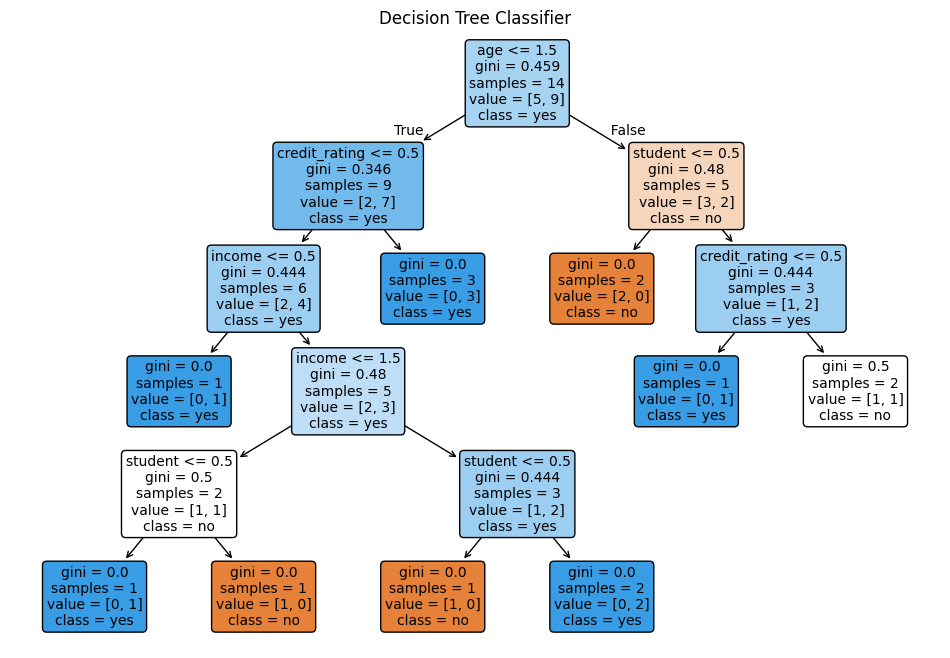

Prediction for Sample 1 (middle_aged, low, yes, excellent): no
Prediction for Sample 2 (senior, high, no, excellent): no


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: dataframe
data = {
    'age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'middle_aged', 'youth', 'youth', 'senior', 'senior', 'youth', 'middle_aged', 'middle_aged', 'senior'],
    'income': ['high', 'high', 'high', 'low', 'low', 'low', 'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent', 'fair', 'excellent', 'fair', 'excellent', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Step 2: categorical colum into numeric by LE
le = LabelEncoder()

df['age'] = le.fit_transform(df['age'])
df['income'] = le.fit_transform(df['income'])
df['student'] = le.fit_transform(df['student'])
df['credit_rating'] = le.fit_transform(df['credit_rating'])
df['buys_computer'] = le.fit_transform(df['buys_computer'])

# Step 3: define features  and target
X = df.drop(columns=['buys_computer'])  # Features
y = df['buys_computer']  # Target

# Step 4: Build a DT Classifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

# Step 5: V DT
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()

# Step 6: Pred
# Sample 1: (age = middle_aged, income = low, student = yes, credit_rating = excellent)
sample1 = pd.DataFrame([[2, 0, 1, 1]], columns=X.columns)  # encoded values
prediction1 = dt.predict(sample1)

# Sample 2: (age = senior, income = high, student = no, credit_rating = excellent)
sample2 = pd.DataFrame([[3, 2, 0, 1]], columns=X.columns)  # ev for sample
prediction2 = dt.predict(sample2)

# Step 7: Prip
print(f"Prediction for Sample 1 (middle_aged, low, yes, excellent): {le.inverse_transform(prediction1)[0]}")
print(f"Prediction for Sample 2 (senior, high, no, excellent): {le.inverse_transform(prediction2)[0]}")